# Rayleigh−Plesset
See https://pubs.acs.org/doi/pdf/10.1021/acs.iecr.1c00233
$$
\rho\left(R\ddot{R} + \frac{3}{2}(\dot{R})^2\right)=\left(p_0 + \frac{2\sigma}{R_0}-p_v\right)\left(\frac{R_0}{R}\right)^{3\kappa} + p_v - \frac{2\sigma}{R} - \frac{4\eta\dot{R}}{R}-p_0-p_A(t)
$$

which can be rearranged as $y=(R, V)$ and:

$$
\begin{aligned}\dot{R}= & V\\
\dot{V}= & -\frac{3}{2}\frac{V^{2}}{R}+\frac{1}{\rho R}\left(\left(p_{0}+\frac{2\sigma}{R_{0}}-p_{v}\right)\left(\frac{R_{0}}{R}\right)^{3\kappa}+p_{v}-\frac{2\sigma}{R}-\frac{4\eta V}{R}-p_{0}-p_{A}(t)\right)
\end{aligned}
$$

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
R0 = 10e-6 # m
pv = 3.9e3 # Pa
p0 = 1.01325e5 #Pa
eta = 0.56e-3 #Pa.s
sigma = 0.028 #N/m
rho = 940 # kg/m^3
kappa = 1.4
p1 = p0 + 2*sigma/R0 - pv


pA = 5e5 # Pa
f = 20e3 # Hz

def forcing(t):
    return pA*np.sin(2*np.pi*f*t)

def RayleighPlesset(t, y):
    out = np.empty_like(y)
    out[0] = y[1]
    out[1] = -1.5*y[1]**2/y[0] + 1./(rho*y[0])*(p1*(R0/y[0])**3*(kappa)
                                                + pv - p0 
                                                - 2*sigma/y[0]
                                                - 4*eta*y[1]/y[0]
                                                - forcing(t)
                                               )
    return out

In [17]:
sol = solve_ivp(RayleighPlesset, (0, 100e-6), [R0, 0], max_step=1e-8)

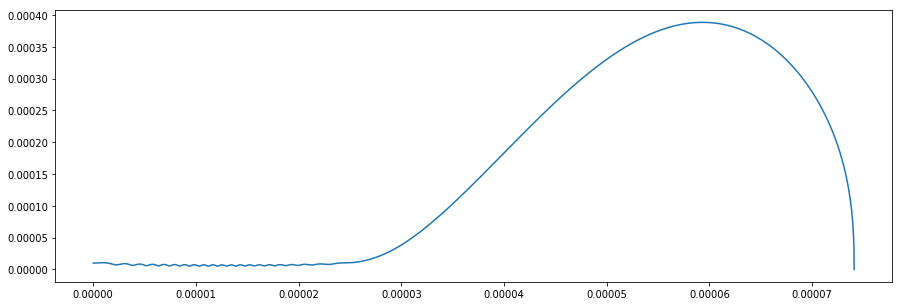

In [18]:
t = sol.t
R = sol.y[0]
V = sol.y[1]

plt.plot(t, R)

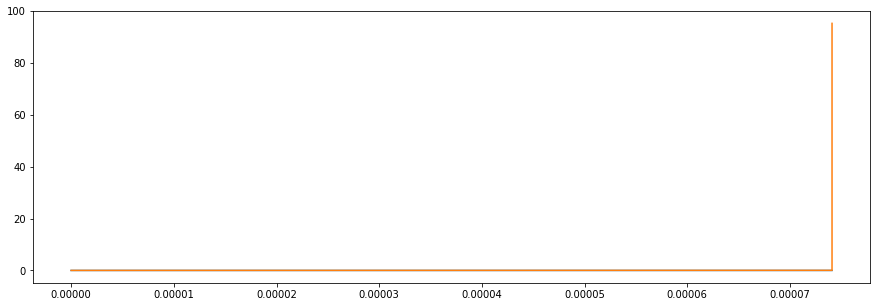

In [35]:
# Determine validity based on speed of sound
V[np.abs(V) > 450] = np.nan
R[np.abs(R) < 100e-9] = np.nan

# Lagrangian radius, RL0 = alpha*R0, so alpha > 1
alpha = 1000
RL = (1 + (alpha-1)*R0**3/R**3)*R

plt.plot(t, R)
plt.plot(t, RL)

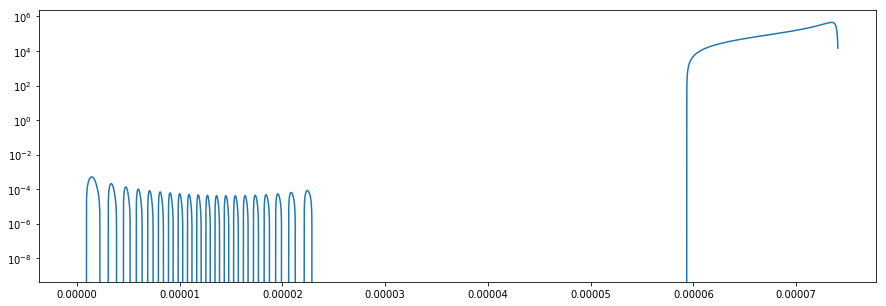

In [32]:
# Lagrangian strain rate
E = -2*V*R**2/RL**3

plt.semilogy(t, E)

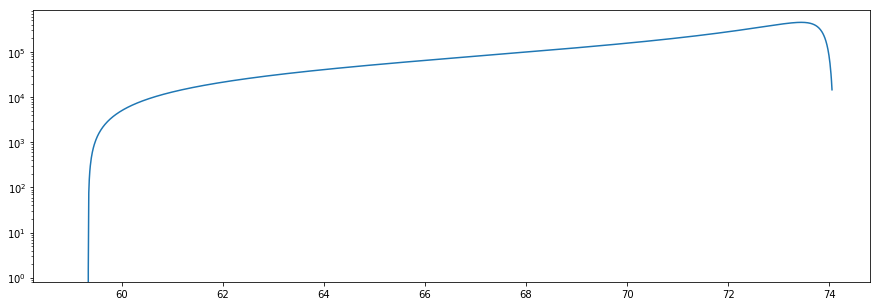

In [33]:
Eplus = E[t>59e-6]
tplus = t[t>59e-6]

plt.semilogy(tplus*1e6, Eplus)

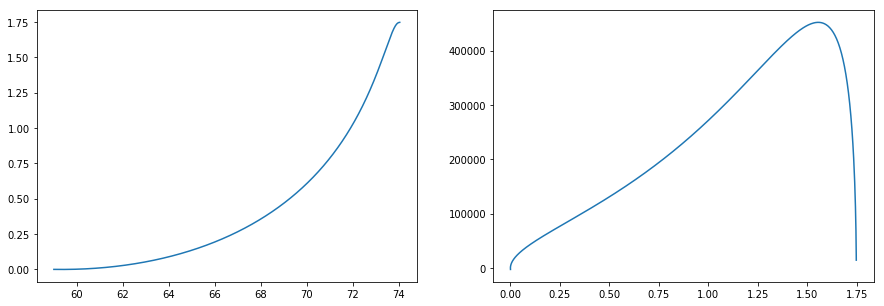

In [34]:
dt = np.zeros_like(tplus)
dt[1:] = np.diff(tplus)
H = np.cumsum(Eplus*dt)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(tplus*1e6, H)
ax[1].plot(H, Eplus)

In [37]:
# Lagrangian radius, RL0 = alpha*R0, so alpha > 1
alphas = np.logspace(0,3,10)
RLs = []
for alpha in alphas:
    RLs.append((1 + (alpha-1)*R0**3/R[t>59e-6]**3)*R[t>59e-6])
Es = []
for RL in RLs:
    Es.append(-2*V[t>59e-6]*R[t>59e-6]**2/RL**3)
Hs = []
dt = np.zeros_like(tplus)
dt[1:] = np.diff(tplus)
for E in Es:
    Hs.append(np.cumsum(E*dt))

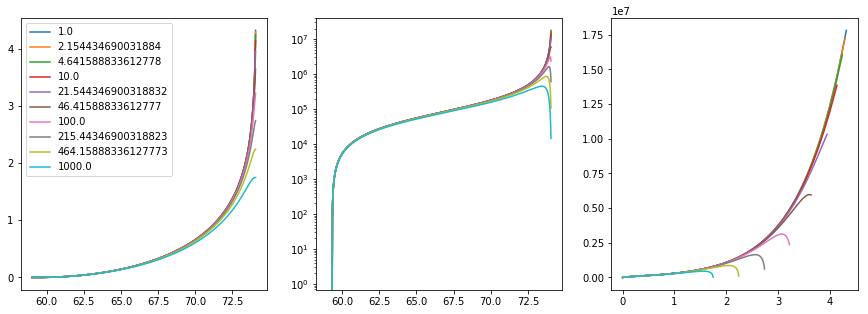

In [47]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(nrows=1, ncols=3)
for alpha, H in zip(alphas, Hs):
    ax[0].plot(tplus*1e6, H, label=alpha)
ax[0].legend()
for E in Es:
    ax[1].semilogy(tplus*1e6, E)
for E, H in zip(Es, Hs):
    ax[2].plot(H, E)
#ax[1].plot(H, Es)